# ML Final project
### BAX 452-001

**03/10/2024**

**Group 1: Nithyashre, Yuxin Li, Chi Nam Tran, Zhouling Shen**

### Introduction

To embark on the exploration and analysis of a dataset featuring blockchain financial transactions within the Open Metaverse (https://www.kaggle.com/datasets/faizaniftikharjanjua/metaverse-financial-transactions-dataset) , we will undertake a structured approach to unravel the complexities and insights embedded in the data. Our objective is to enhance the understanding of anomaly detection, fraud analysis, and predictive analytics within this burgeoning virtual space.

The dataset at hand presents an amalgamation of transaction types, user behaviors, and varied risk profiles from across the globe, offering a realistic and applicable landscape for in-depth analysis. We aim to employ a sequence of analytical steps, beginning with the encoding of categorical variables to facilitate their inclusion in machine learning models. An exploratory data analysis (EDA) will follow, providing a visual and statistical investigation into the nature and characteristics of the dataset.

Subsequently, we will navigate through an array of machine learning models, assessing their suitability and performance in capturing the patterns and predictive signals inherent in the data. The final phase of our analysis will concentrate on extracting significant variables from the highest-performing model based on chosen metrics, thereby pinpointing the key drivers of the risk score within the Open Metaverse. This methodical progression from data preprocessing to model evaluation and feature importance will serve to illuminate the factors that influence virtual financial transactions, thereby contributing valuable insights to the domain of metaverse analytics.


In [ ]:
## import all needed sources
import time
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
import plotly.express as px
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import norm, skew
from sklearn.cluster import KMeans
import statsmodels.formula.api as smf
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, precision_score,recall_score
import plotly.graph_objects as go

In [ ]:
metaverse = pd.read_csv("metaverse_transactions_dataset.csv")

In [ ]:
metaverse.head()

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk


## 1. Understanding the dataset

In [ ]:
metaverse.info() # 78600 entires, 14 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          78600 non-null  object 
 1   hour_of_day        78600 non-null  int64  
 2   sending_address    78600 non-null  object 
 3   receiving_address  78600 non-null  object 
 4   amount             78600 non-null  float64
 5   transaction_type   78600 non-null  object 
 6   location_region    78600 non-null  object 
 7   ip_prefix          78600 non-null  float64
 8   login_frequency    78600 non-null  int64  
 9   session_duration   78600 non-null  int64  
 10  purchase_pattern   78600 non-null  object 
 11  age_group          78600 non-null  object 
 12  risk_score         78600 non-null  float64
 13  anomaly            78600 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 8.4+ MB


In [ ]:
missing_values = metaverse.isnull().sum()
missing_values

timestamp            0
hour_of_day          0
sending_address      0
receiving_address    0
amount               0
transaction_type     0
location_region      0
ip_prefix            0
login_frequency      0
session_duration     0
purchase_pattern     0
age_group            0
risk_score           0
anomaly              0
dtype: int64

## 2. EDA (Exploring Data Analysis)

In [ ]:
# Count the occurrences of each transaction type within each location region
count_transaction_by_region = metaverse.groupby(['location_region', 'transaction_type']).size().reset_index(name='count')

# Create a stacked bar chart for the count of transaction types by location region
fig = px.bar(count_transaction_by_region, x='location_region', y='count',
             color='transaction_type', title='Count of Transaction Types by Location Region',
             labels={'count': 'Count', 'location_region': 'Location Region', 'transaction_type': 'Transaction Type'})

# Improve layout
fig.update_layout(
    xaxis_title="Location Region",
    yaxis_title="Count",
    barmode='stack',
    title={'x':0.5, 'xanchor': 'center'}
)

# Show the plot
fig.show()

**2a. Interpretation**:

The bar chart above illustrating the count distribution of transaction types across different location regions, indicates a consistent pattern among continents regarding transaction behavior. Notably, transaction types with negative connotations, such as "scam" and "phishing," exhibit a significantly lower distribution across all regions when compared to more conventional transactions, including "transfer," "purchase," and "sale." This uniformity in distribution patterns across various geographical locations suggests that standard transaction types dominate the landscape, while adverse activities maintain a minimal presence.

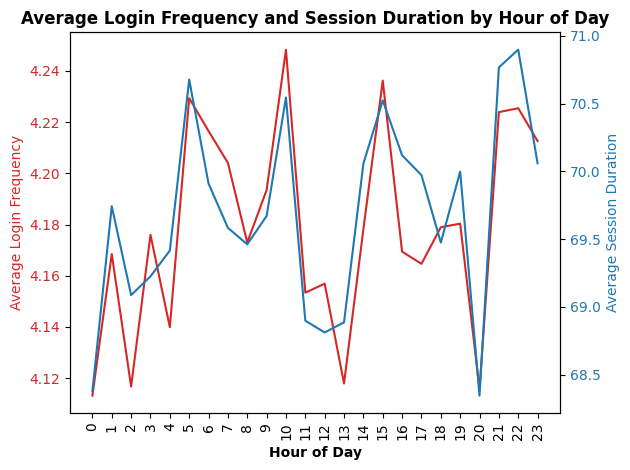

In [ ]:
# Calculate the averages
avg_login_by_hour = metaverse.groupby('hour_of_day')['login_frequency'].mean()
avg_session_by_hour = metaverse.groupby('hour_of_day')['session_duration'].mean()

# Create figure and axis objects
fig, ax1 = plt.subplots()

# Plot "login_frequency" on the left y-axis
color = 'tab:red'
ax1.set_xlabel('Hour of Day', fontweight='bold')
ax1.set_ylabel('Average Login Frequency', color=color)
ax1.plot(avg_login_by_hour.index, avg_login_by_hour, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Set the ticks for "Hour of Day" on x-axis
hours = np.arange(24)
ax1.set_xticks(hours)
ax1.set_xticklabels(hours, rotation=90)

# Create another y-axis for "session_duration" on the right
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average Session Duration', color=color)
ax2.plot(avg_session_by_hour.index, avg_session_by_hour, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and show the plot
plt.title('Average Login Frequency and Session Duration by Hour of Day', fontweight='bold')
fig.tight_layout()  # Adjust layout
plt.show()

**2b. Interpretation:**

The line graph presents a comparative analysis of the average login frequency and session duration by hour of day. The login frequency, delineated by the blue line, and the session duration, depicted by the red line, generally exhibit parallel trends with noticeable peaks around 10 am and 3 pm, followed by a discernible trough at 8 pm. An interesting divergence is observed in the late evening hours, particularly from 9 pm to 10 pm, where the session duration surpasses the login frequency, suggesting that while fewer logins occur during this time, the sessions that do initiate tend to be longer in duration.

In [ ]:
# Calculate the average risk_score for each anomaly category
avg_risk_score_by_anomaly = metaverse.groupby('anomaly')['risk_score'].mean().reset_index()

# Define the desired order for the 'anomaly' categories
anomaly_order = ['high_risk', 'moderate_risk', 'low_risk']

# Create the horizontal bar chart with Plotly Express
fig = px.bar(avg_risk_score_by_anomaly,
             y='anomaly',
             x='risk_score',
             title='Average Risk Score by Anomaly',
             labels={'risk_score': 'Average Risk Score', 'anomaly': 'Anomaly'},
             color='anomaly',
             orientation='h',  # Specify the orientation as horizontal
             category_orders={'anomaly': anomaly_order})  # Define the order for 'anomaly'

# Show the plot
fig.show()

**2c. Interpretation**:

The bar chart above provides a risk score comparisons classified by anomaly levels. It reveals that instances labeled as high-risk anomalies are associated with a notably elevated average risk score, approximately at 97. In contrast, those identified as low-risk anomalies correspond with a significantly lower average risk score, in the vicinity of 36.

In [ ]:

# Calculate the count of each transaction_type within each anomaly category
transaction_counts = metaverse.groupby(['anomaly', 'transaction_type']).size().unstack(fill_value=0)

# Define the desired order for the 'anomaly' categories
anomaly_order = ['high_risk', 'moderate_risk', 'low_risk']
transaction_counts = transaction_counts.reindex(anomaly_order)

# Create the plot
fig = go.Figure()

# Add one bar for each transaction_type
for transaction_type in transaction_counts.columns:
    fig.add_trace(go.Bar(
        y=transaction_counts.index,
        x=transaction_counts[transaction_type],
        name=transaction_type,
        orientation='h'
    ))

# Update the layout to adjust visual aspects and add the legend
fig.update_layout(
    title='Count of Transaction Type by Anomaly',
    barmode='stack',  # Enable stacking
    yaxis_title='Anomaly',
    xaxis_title='Count',
    yaxis={'categoryorder':'array', 'categoryarray': anomaly_order},
    legend_title='Transaction Type'
)

# Show the plot
fig.show()

**2d. Interpretation**:

Building on from the previous bar chart detailing anomaly risk levels across different transaction types reveals a discernible pattern. Transaction types classified as "transfer," "sale," and "purchase" predominantly fall within the low risk category. In contrast, transactions labeled as "phishing" and "scam" are considerably represented in the high-risk category, yet they comprise a smaller proportion of the total count when compared to the combined instances of low and moderate risk. This suggests that while "phishing" and "scam" transactions are less frequent, they are more likely to be associated with higher risk levels.

## 3. Data Cleaning


In [ ]:
metaverse_encode = metaverse.copy()
# Using one-hot encoding here for some of these categorial variables, which is useful for interpretation.
metaverse_encode = pd.get_dummies(metaverse_encode, columns=['transaction_type', 'location_region', 'ip_prefix', 'purchase_pattern', 'age_group', 'anomaly'])

metaverse_encode.info() # 32 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   timestamp                      78600 non-null  object 
 1   hour_of_day                    78600 non-null  int64  
 2   sending_address                78600 non-null  object 
 3   receiving_address              78600 non-null  object 
 4   amount                         78600 non-null  float64
 5   login_frequency                78600 non-null  int64  
 6   session_duration               78600 non-null  int64  
 7   risk_score                     78600 non-null  float64
 8   transaction_type_phishing      78600 non-null  uint8  
 9   transaction_type_purchase      78600 non-null  uint8  
 10  transaction_type_sale          78600 non-null  uint8  
 11  transaction_type_scam          78600 non-null  uint8  
 12  transaction_type_transfer      78600 non-null 

**3a. Note**:

We created a copy of the Dataframe ("metaverse") and then apply one-hot encoding to several categorical columns, transforming them into binary variables for each unique category.
This process expands the Dataframe, resulting in a total of 32 columns, including both the newly created binary columns for each category in the specified fields and any existing numerical columns.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# As addresses are all really different, using one-hot can explode the numbers of varaibles, so we are using lable-encoding here.
to_labelEncode = ['sending_address', 'receiving_address']

for c in to_labelEncode:
    lbl = LabelEncoder()
    lbl.fit(list(metaverse_encode[c].values))
    metaverse_encode[c] = lbl.transform(list(metaverse_encode[c].values))

# Dropping the variable "timestamp" as we already have the variable "hour_of_date" to measure the time.
metaverse_encode.drop('timestamp', axis = 1, inplace = True)

metaverse_encode.head() # 31 columns

,hour_of_day,sending_address,receiving_address,amount,login_frequency,session_duration,risk_score,transaction_type_phishing,transaction_type_purchase,transaction_type_sale,...,ip_prefix_192.168,purchase_pattern_focused,purchase_pattern_high_value,purchase_pattern_random,age_group_established,age_group_new,age_group_veteran,anomaly_high_risk,anomaly_low_risk,anomaly_moderate_risk
0,12,700,276,796.949206,3,48,18.75,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,19,960,369,0.010000,5,61,25.00,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,16,227,375,778.197390,3,74,31.25,0,1,0,...,1,1,0,0,1,0,0,0,1,0
3,9,664,629,300.838358,8,111,36.75,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,14,771,508,775.569344,6,100,62.50,0,0,1,...,0,0,1,0,0,0,1,0,0,1


**3b. Note**:

The copied encoded DataFrame is applied label encoding to the 'sending_address' and 'receiving_address' columns, which have a large number of unique values. Label encoding converts each unique string in these columns into a numerical value, preventing the creation of a prohibitively large number of new variables that would result from one-hot encoding. Following this, the 'timestamp' column is removed from the DataFrame under the assumption that the 'hour_of_day' variable sufficiently captures the necessary temporal information.

## 4. Data Training & Testing

**Goal**:

"Risk_score" is our target variable. We are trying to see which variables could influence the risk_score, which measures the risk of each transactions based on the transaction characteristics and user behavior.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = metaverse_encode.drop(['risk_score'], axis = 1)
y = metaverse_encode['risk_score']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5a. Linear Regression Model

In [ ]:
# Add a constant to the scaled training data to include an intercept in the model
X_train_scaled_with_const = sm.add_constant(X_train_scaled)

# Fit the Linear Regression model using statsmodels
model = sm.OLS(y_train, X_train_scaled_with_const).fit()

# Print the summary of the regression model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             risk_score   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 8.633e+04
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:37:00   Log-Likelihood:            -1.5059e+05
No. Observations:               55020   AIC:                         3.012e+05
Df Residuals:                   54998   BIC:                         3.014e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.9809      0.016   2823.484      0.000      44.950      45.012
x1            -3.4693      0.017   -208.758      0.000      -3.502      -3.437
x2            -0.0253      0.016     -1.590      0.112      -0.057       0.006
x3             0.0027      0.016      0.170      0.865      -0.029       0.034
x4             1.9548      0.016    119.493      0.000       1.923       1.987
x5            -0.0816      0.052     -1.567      0.117      -0.184       0.020
x6            -0.0368      0.042     -0.874      0.382      -0.119       0.046
x7             4.2802      0.013    327.523      0.000       4.255       4.306
x8            -0.0953      0.015     -6.468      0.000      -0.124      -0.066
x9             1.4287      0.015     93.864      0.000       1.399       1.459
x10            4.3814      0.012    379.957      0.000       4.359       4.404
x11           -5.2116      0.012   -440.871      0.000      -5.235      -5.188
x12            0.0047      0.013      0.370      0.712      -0.020       0.030
x13           -0.0193      0.013     -1.519      0.129      -0.044       0.006
x14            0.0103      0.013      0.806      0.420      -0.015       0.035
x15            0.0003      0.013      0.020      0.984      -0.025       0.025
x16            0.0041      0.013      0.324      0.746      -0.021       0.029
x17            0.0131      0.013      1.029      0.303      -0.012       0.038
x18           -0.0068      0.013     -0.535      0.593      -0.032       0.018
x19           -0.0017      0.013     -0.133      0.894      -0.027       0.023
x20           -0.0054      0.013     -0.420      0.675      -0.030       0.020
x21            0.0008      0.013      0.059      0.953      -0.024       0.026
x22           -2.7416      0.008   -355.315      0.000      -2.757      -2.727
x23            2.5339      0.021    123.451      0.000       2.494       2.574
x24            0.1991      0.018     11.075      0.000       0.164       0.234
x25           -2.7416      0.008   -355.315      0.000      -2.757      -2.727
x26            0.1991      0.018     11.075      0.000       0.164       0.234
x27            2.5339      0.021    123.451      0.000       2.494       2.574
x28            6.2324      0.008    787.823      0.000       6.217       6.248
x29           -4.3814      0.009   -469.641      0.000      -4.400      -4.363
x30            0.0300      0.014      2.181      0.029       0.003       0.057
==============================================================================
Omnibus:                     2923.328   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3776.889
Skew:                           0.524   Prob(JB):                         0.00
Kurtosis:                       3.741   Cond. No.                     2.21e+16
==

**5a. Interpretation:**

The OLS model exhibits strong explanatory power for the risk score variability, evidenced by a robust R-squared value of 0.971 and a significant collective impact of the predictors as reflected by the high F-statistic. Nevertheless, the considerable condition number raises concerns about multicollinearity, suggesting the model's predictions could be sensitive to small input variations and that some predictors may not contribute meaningful information, as indicated by their non-significant coefficients.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

X_test_scaled_with_const = sm.add_constant(X_test_scaled)

# Use the fitted model to make predictions on the scaled test data
predictions_ols = model.predict(X_test_scaled_with_const)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, predictions_ols)

# Calculate the coefficient of determination
r2 = r2_score(y_test, predictions_ols)

mse, r2

(14.11487518241943, 0.9702450525110586)

## 5b. LASSO model

The LASSO (Least Absolute Shrinkage and Selection Operator) model is a regression technique that both penalizes the absolute size of regression coefficients and can reduce the number of variables upon which the given solution is dependent.








In [ ]:
# Initialize the Lasso model with an alpha value
lasso_model = Lasso(alpha=0.05)

# Fit the Lasso model to the scaled training data
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the training and test data
y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)

# Calculate MSE and R² for the training set
train_mse_lasso = mean_squared_error(y_train, y_train_pred_lasso)
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)

# Calculate MSE and R² for the test set
test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

# Print the evaluation metrics
print(f"\nTraining MSE (Lasso): {train_mse_lasso:.3f}")
print(f"Test MSE (Lasso): {test_mse_lasso:.3f}")
print(f"Training R² (Lasso): {train_r2_lasso:.3f}")
print(f"Test R² (Lasso): {test_r2_lasso:.3f}")


Training MSE (Lasso): 13.977
Test MSE (Lasso): 14.127
Training R² (Lasso): 0.971
Test R² (Lasso): 0.970


**5b. Interpretation**:

The results from the LASSO model demonstrate a high degree of predictive accuracy and consistency between the training and test datasets, with a Mean Squared Error (MSE) of approximately 13.977 for the training set and 14.127 for the test set. Additionally, the model explains around 97% of the variability in the risk score for both training and test sets, as indicated by the R-squared values of 0.971 and 0.970, respectively.

## 5c. RIDGE model

Ridge regression is a method that applies L2 regularization to impose a penalty on the size of coefficients, thereby preventing overfitting and reducing multicollinearity, which enhances the model's stability and predictive capability.

In [ ]:
# Initialize and fit the Ridge regression model
ridge_model = Ridge(alpha=0.05)
ridge_model.fit(X_train_scaled, y_train)

# Predict on training and test data
y_train_pred_ridge = ridge_model.predict(X_train_scaled)
y_test_pred_ridge = ridge_model.predict(X_test_scaled)

# Calculate MSE and R² for the training set
train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)

# Calculate MSE and R² for the test set
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

# Print the evaluation metrics
print("Ridge Regression:")
print(f"Training MSE: {train_mse_ridge:.3f}")
print(f"Test MSE: {test_mse_ridge:.3f}")
print(f"Training R²: {train_r2_ridge:.3f}")
print(f"Test R²: {test_r2_ridge:.3f}")

Ridge Regression:
Training MSE: 13.958
Test MSE: 14.115
Training R²: 0.971
Test R²: 0.970


**5c. Interpretation**:


The RIDGE model's outcomes showcase notable predictive precision and coherence across the training and test datasets, evidenced by a Mean Squared Error (MSE) of roughly 13.958 for the training set and 14.115 for the test set. Moreover, the model accounts for approximately 97% of the variance in the risk score for both the training and test environments, as reflected by R-squared (R²) values of 0.971 and 0.970, respectively.

## 5d. Elastic Net Model

Elastic Net Regression is a hybrid approach that combines L1 and L2 regularization, offering a balanced solution that effectively manages multicollinearity and feature selection to improve model reliability and interpretability.

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Initialize and fit the Elastic Net model
elastic_net_model = ElasticNet(alpha=0.05, l1_ratio=0.5)
elastic_net_model.fit(X_train_scaled, y_train)

# Predict on training and test data
y_train_pred_elastic = elastic_net_model.predict(X_train_scaled)
y_test_pred_elastic = elastic_net_model.predict(X_test_scaled)

# Calculate MSE and R² for the training set
train_mse_elastic = mean_squared_error(y_train, y_train_pred_elastic)
train_r2_elastic = r2_score(y_train, y_train_pred_elastic)

# Calculate MSE and R² for the test set
test_mse_elastic = mean_squared_error(y_test, y_test_pred_elastic)
test_r2_elastic = r2_score(y_test, y_test_pred_elastic)

# Print the evaluation metrics
print("\nElastic Net Regression:")
print(f"Training MSE: {train_mse_elastic:.3f}")
print(f"Test MSE: {test_mse_elastic:.3f}")
print(f"Training R²: {train_r2_elastic:.3f}")
print(f"Test R²: {test_r2_elastic:.3f}")


Elastic Net Regression:
Training MSE: 14.053
Test MSE: 14.189
Training R²: 0.970
Test R²: 0.970


**5d. Interpretation**:

The Elastic Net Regression model exhibits strong predictive accuracy and maintains consistency between the training and testing datasets, highlighted by a Training Mean Squared Error (MSE) of 14.053 and a Test MSE of 14.189. The model demonstrates a robust ability to explain the variability in the risk score, achieving an R-squared (R²) value of 0.970 for both the training and test sets.

## 5e. Decision Tree Model

Decision Tree model is a non-linear predictive modeling tool that can be used for both classification and regression tasks. It operates by breaking down a dataset into smaller subsets based on certain conditions, while at the same time, an associated decision tree is incrementally developed.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=1)

# Fit the model to the scaled training data
dt_regressor.fit(X_train_scaled, y_train)

# Use the fitted model to make predictions on the test set
predictions_dt = dt_regressor.predict(X_test_scaled)

# Evaluate the model performance
mse = mean_squared_error(y_test, predictions_dt)
r2 = r2_score(y_test, predictions_dt)

# Print performance metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.002238761662425785
R-squared: 0.9999952805650177


**5e. Interpretation**:

The Decision Tree model, after being trained on scaled training data, demonstrated exceptional predictive performance on the test set, as evidenced by an extraordinarily low Mean Squared Error (MSE) and a near-perfect R-squared (R²) value. These metrics indicate that the model can predict the risk score with minimal error, accounting for virtually all the variability in the target variable within the test dataset.

## 5f. Bootstrappped Random Forest

A bootstrapped random forest is an ensemble technique that combines the predictions of several decision tree models to improve the overall accuracy and robustness. Each tree in the forest is built from a bootstrapped sample of the training data, meaning a random selection with replacement, which ensures diversity among the trees.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Set minimum number of sample to 3 which can help prevent overfitting.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, min_samples_split=3)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(min_samples_split=3, random_state=42)

In [ ]:
# Prediction
predictions_rf = rf_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, predictions_rf)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.005222043531992187


**5f. Interpretation**:

After training the bootstrapped random forest regressor with a minimum sample split of 3 to mitigate overfitting.
The model achieved a low value Mean Squared Error (MSE) value indicating a high level of accuracy in the model’s predictions relative to the actual values, showcasing the model's efficacy in capturing the underlying patterns of the dataset.

We are also going to try neural network to see if it could generates a better result, considering the possibility of capturing complex interactions between variables through the network structure.

## 5g. Neural Network

Considering the possibility of capturing complex interactions between variables through the network structure we're looking into Neural Network. It's a computational model inspired by the structure of neural circuits in the human brain, capable of capturing complex relationships between inputs and outputs through layers of interconnected nodes or "neurons."

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

In [ ]:
# Define the Neural Network model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))  # Input layer and 1st hidden layer
model.add(Dense(units=32, activation='relu'))  # 2nd hidden layer
model.add(Dense(units=1, activation='linear'))  # Output layer for regression

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32)  # Adjust epochs and batch_size as needed

# Predict using the neural network
nn_predictions = model.predict(X_test_scaled).flatten()  # Flatten predictions to match y_test's shape

Epoch 1/100
1720/1720 [==============================] - 9s 4ms/step - loss: 112.8631
Epoch 2/100
1720/1720 [==============================] - 4s 3ms/step - loss: 7.8805
Epoch 3/100
1720/1720 [==============================] - 3s 2ms/step - loss: 7.0811
Epoch 4/100
1720/1720 [==============================] - 3s 2ms/step - loss: 6.0593
Epoch 5/100
1720/1720 [==============================] - 3s 2ms/step - loss: 5.0080
Epoch 6/100
1720/1720 [==============================] - 4s 2ms/step - loss: 4.3076
Epoch 7/100
1720/1720 [==============================] - 3s 2ms/step - loss: 3.7478
Epoch 8/100
1720/1720 [==============================] - 3s 2ms/step - loss: 3.2022
Epoch 9/100
1720/1720 [==============================] - 3s 2ms/step - loss: 2.7293
Epoch 10/100
1720/1720 [==============================] - 4s 2ms/step - loss: 2.3629
Epoch 11/100
1720/1720 [==============================] - 3s 2ms/step - loss: 2.0462
Epoch 12/100
1720/1720 [==============================] - 3s 2ms/step - 

The decreasing loss throughout each epoch indicates that the neural network model is learning from the data over time, adjusting its weights to better predict the risk score.

In [ ]:
# Calculate the MSE for the neural network
mse_nn = mean_squared_error(y_test, nn_predictions)

# Print MSE of the Neural Network
print(f"Neural Network MSE: {mse_nn}")

Neural Network MSE: 0.19381035552269954


**5g. Interpretation**:

The training process of the neural network, as observed over 100 epochs, shows a gradual decrease in loss, culminating at 0.2011, indicative of the model's learning and adaptation over time. Notably, the final Mean Squared Error (MSE) when compared to those of the Random Forest and Decision Tree models, is higher, suggesting that the neural network may not be as effective in this specific instance at generalizing its learned patterns to unseen data.


## 6. Model Comparison

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

models_predictions = {
    'OLS': predictions_ols,
    'LASSO': y_test_pred_lasso,
    'Ridge': y_test_pred_ridge,
    'Elastic Net': y_test_pred_elastic,
    'Bootstrapped_RandomForest': predictions_rf,
    'DecisionTree': predictions_dt,
    'NeuralNetwork': nn_predictions
}

comparison_table = []

for model_name, predictions in models_predictions.items():
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    # Append the calculated metrics for the current model to the comparison table
    comparison_table.append({
        'Model': model_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    })

# Convert comparison table to DataFrame for better visualization
import pandas as pd

comparison_df = pd.DataFrame(comparison_table)

In [ ]:
comparison_df

,Model,MAE,MSE,RMSE,R²
0,OLS,2.911923,14.114875,3.756977,0.970245
1,LASSO,2.903027,14.127289,3.758629,0.970219
2,Ridge,2.911922,14.114874,3.756977,0.970245
3,Elastic Net,2.903675,14.188898,3.766815,0.970089
4,Bootstrapped_RandomForest,0.001931,0.005222,0.072264,0.999989
5,DecisionTree,0.000581,0.002239,0.047316,0.999995
6,NeuralNetwork,0.223509,0.193810,0.440239,0.999591


**6. Interpretation**:


The comparative analysis of the models indicates that the Bootstrapped Random Forest and Decision Tree exhibit superior performance with the lowest Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE), alongside near-perfect R-squared (R²) values. These models outperform the linear models (OLS, LASSO, Ridge, and Elastic Net) on the test data.

**Consequently, the significant features identified by the Bootstrapped Random Forest and Decision Tree models will be pivotal in informing the conclusions of our report.**

## 7a. Further Analysis of Decison Tree Model

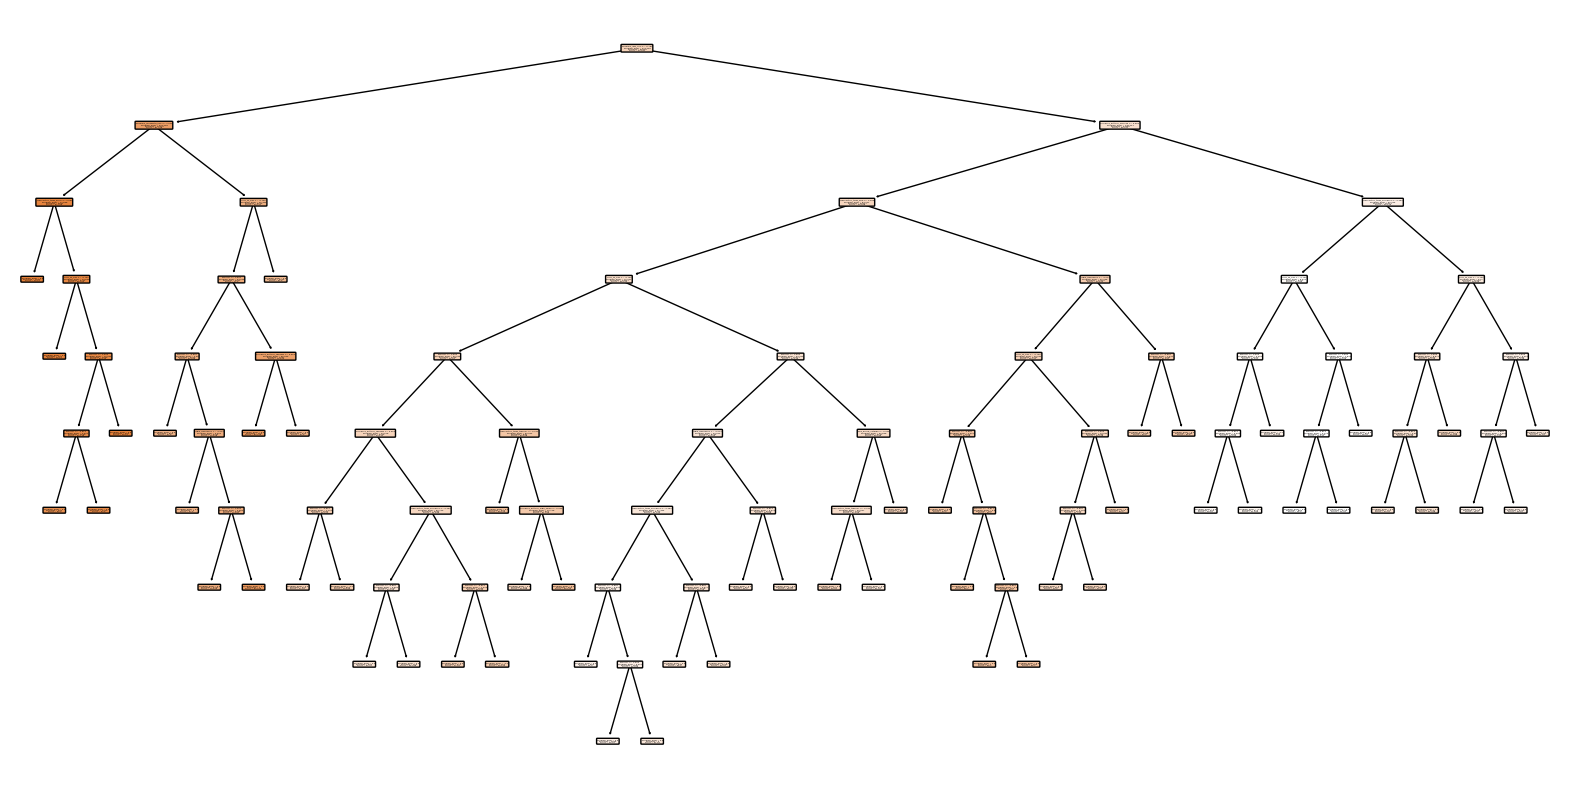

In [ ]:
from sklearn.tree import plot_tree
# Convert the column index to a list
feature_names_list = X.columns.tolist()

# Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(dt_regressor, filled=True, feature_names=feature_names_list, rounded=True)
plt.show()

**7a. Interpretation**:

Based on above, top features that are important are anomaly_low_risk, purchase_pattern_focused, anomaly_moderate_risk, hour_of_day, transaction_type_sale, transaction_type_purchase. And there are most that half of the features did not contribute to the decision tree. To be less prone to the risk of overfitting, we are using bootstrapped random forest below to continue of the modeling.

In [ ]:
# Extract feature importances from the model
importances = dt_regressor.feature_importances_

# Convert to a Series for convenient viewing
importances_series = pd.Series(importances, index=feature_names_list)

# Sort the feature importances for better visualization
sorted_importances = importances_series.sort_values(ascending=False)

# Print the sorted importances
print(sorted_importances)

anomaly_low_risk                 0.667411
purchase_pattern_focused         0.118958
anomaly_moderate_risk            0.081091
hour_of_day                      0.037995
transaction_type_sale            0.034314
transaction_type_purchase        0.030509
amount                           0.015613
login_frequency                  0.004885
purchase_pattern_random          0.003683
transaction_type_transfer        0.002563
purchase_pattern_high_value      0.001629
age_group_veteran                0.000752
transaction_type_scam            0.000596
ip_prefix_192.0                  0.000000
receiving_address                0.000000
anomaly_high_risk                0.000000
age_group_new                    0.000000
age_group_established            0.000000
ip_prefix_192.168                0.000000
ip_prefix_172.0                  0.000000
ip_prefix_172.16                 0.000000
session_duration                 0.000000
ip_prefix_10.0                   0.000000
sending_address                  0

**7a. Interpretation**:

The variable 'anomaly_low_risk' emerged with the highest importance score, accounting for approximately 66.74% of the model's predictive power, suggesting it has the most significant impact on the outcome. Notably, 'purchase_pattern_focused' and 'anomaly_moderate_risk' also showed considerable influence with importance scores of about 11.90% and 8.11% respectively. 'Hour_of_day' and transaction-related variables such as 'transaction_type_sale' and 'transaction_type_purchase' were identified as other impactful predictors, albeit to a lesser extent. Interestingly, several variables, including various IP prefixes, transaction types like 'scam' and 'phishing,' as well as all location regions and the 'sending_address,' did not contribute to the model's decision-making, reflecting zero importance.

## 7b. Further Analysis of Bootstrappped Random Forest

In [ ]:
# Compute Permutation Feature Importance
from sklearn.inspection import permutation_importance
result = permutation_importance(rf_model, X_test_scaled, y_test, n_repeats=10, random_state=1)
feature_importances_perm = result.importances_mean

print("Feature importances using PFI: ", feature_importances_perm)

Feature importances using PFI:  [9.60119689e-02 0.00000000e+00 0.00000000e+00 3.52560640e-02
 1.39147510e-03 1.32784653e-03 5.49261035e-04 6.93042628e-02
 1.13147416e-01 6.35562565e-04 5.10224312e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.05163623e-02 3.06113830e-03 8.38024551e-04
 9.76723572e-02 1.48538174e-03 2.01188935e-03 1.43598675e-02
 1.50679874e+00 4.16591589e-02]


In [ ]:
# Get the indices of the importances in descending order
sorted_indices = np.argsort(feature_importances_perm)[::-1]

# Print the feature ranking
print("Feature ranking:")
for i in sorted_indices:
    print(f"{X.columns[i]}: {feature_importances_perm[i]}")

Feature ranking:
anomaly_low_risk: 1.5067987407615107
transaction_type_sale: 0.11314741586381705
age_group_established: 0.09767235721721106
hour_of_day: 0.09601196894926678
transaction_type_purchase: 0.06930426275585325
purchase_pattern_focused: 0.06051636234208463
anomaly_moderate_risk: 0.041659158927582686
amount: 0.03525606404648224
anomaly_high_risk: 0.014359867541898042
transaction_type_transfer: 0.005102243121002692
purchase_pattern_high_value: 0.003061138297810395
age_group_veteran: 0.002011889345915496
age_group_new: 0.0014853817391844548
login_frequency: 0.001391475100205941
session_duration: 0.0013278465297946519
purchase_pattern_random: 0.0008380245511421358
transaction_type_scam: 0.0006355625652014641
transaction_type_phishing: 0.0005492610351211958
sending_address: 0.0
receiving_address: 0.0
location_region_Africa: 0.0
location_region_Asia: 0.0
location_region_Europe: 0.0
location_region_South America: 0.0
ip_prefix_10.0: 0.0
ip_prefix_172.0: 0.0
ip_prefix_172.16: 0.0
ip_p

**7b. Interpretation**:

We employ Permutation Feature Importance (PFI) as a methodological approach to quantify the significance of individual predictors within our model by observing the increase in prediction error following the random permutation of each feature's values. Through this technique, we have identified several key features that demonstrably influence the model's predictive accuracy. Notably, the features classified as 'anomaly_low_risk', 'transaction_type_sale', 'age_group_established', 'hour_of_day', 'transaction_type_purchase', and 'purchase_pattern_focused' emerged as particularly pivotal. Among these, with the exception of 'anomaly_low_risk'—whose critical importance is somewhat intuitive—the features 'purchase_pattern_focused', 'hour_of_day', 'transaction_type_purchase', and 'transaction_type_sale' have been consistently identified as integral to the model’s performance across both models examined. This consistent recognition underscores their fundamental role in enhancing the model's predictive capability, highlighting the nuanced dynamics that drive model accuracy and the complex interplay of factors influencing risk assessment.